In [209]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="whitegrid")
from tqdm import tqdm

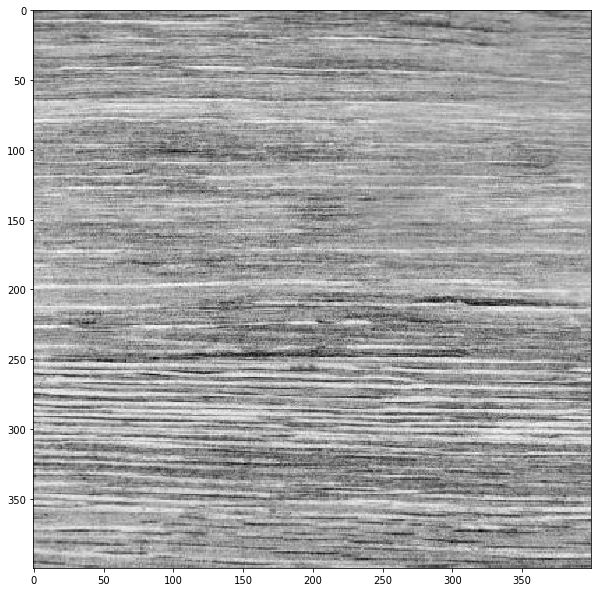

In [73]:
to_grey=lambda x: cv2.cvtColor(x,cv2.COLOR_BGR2GRAY)
img=cv2.imread("group_5.jpg")
img=to_grey(img)
plt.figure(figsize=(10,15))
plt.imshow(img,cmap="gray")

In [95]:
# calc of x_bar_bar and s_bar
x_bar_bar=[]
s_bar=[]
for idx in range(400):
    row=img[idx]
    x_bar=row.mean()
    x_bar_bar.append(x_bar)
    s_=np.std(row,ddof=1)
    s_bar.append(s_)
x_bar_bar=np.mean(x_bar_bar)
s_bar=np.mean(s_bar)

In [96]:
# calc of a3,b3,b4
def calcs(n):
    c_4=(4*(n-1))/(4*n-3)
    a_3=3/(c_4*np.sqrt(n))
    b_3=1-3/(c_4*np.sqrt(2*(n-1)))
    b_4=1+3/(c_4*np.sqrt(2*(n-1)))
    return a_3,b_3,b_4
a_3,b_3,b_4=calcs(400)
x_ucl=x_bar_bar+a_3*s_bar
x_lcl=x_bar_bar-a_3*s_bar
s_ucl=b_4*s_bar
s_lcl=b_3*s_bar

In [97]:
img_controlled=[]
for i in range(400):
    row=img[i].copy()
    s_=np.std(row,ddof=1)
    if s_<s_ucl and s_>s_lcl:
        row=np.where((row<x_lcl)|(row>x_ucl),row,0)
    else:
        row=[0]*400
    img_controlled.append(row)
img_controlled=np.array(img_controlled)

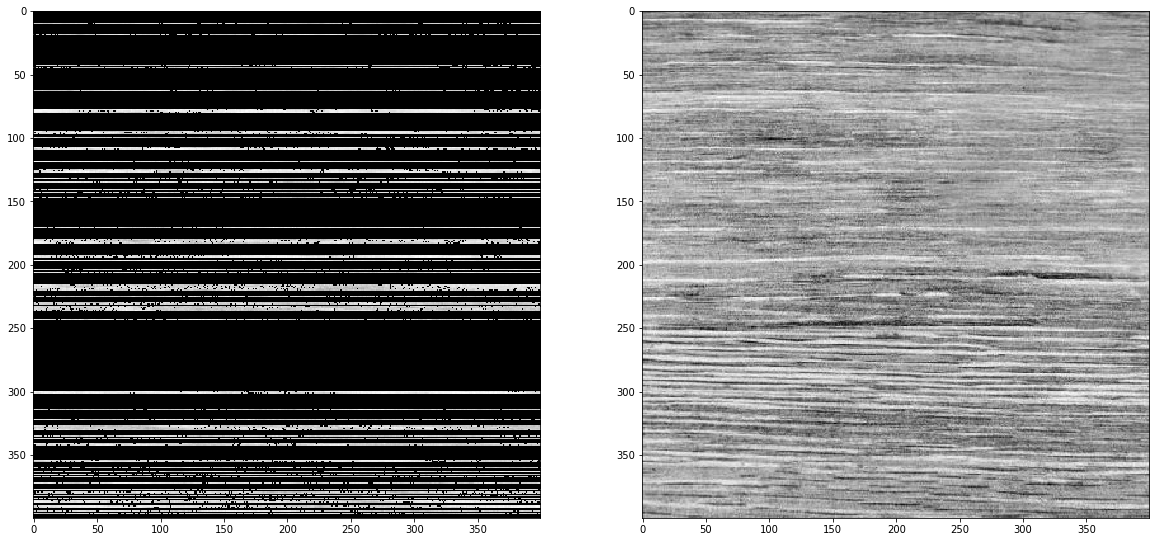

In [102]:
#applying control
img_controlled_x=np.where((img<x_lcl)|(img>x_ucl),img,0)
fig,ax=plt.subplots(ncols=2,figsize=(20,15))
ax[0].imshow(img_controlled,cmap="gray")
ax[1].imshow(img,cmap="gray")

In [103]:
# calc of x_bar_bar and s_bar
x_bar_bar=[]
s_bar=[]
for idx in range(400):
    row=img[:,idx]
    x_bar=row.mean()
    x_bar_bar.append(x_bar)
    s_=np.std(row,ddof=1)
    s_bar.append(s_)
x_bar_bar=np.mean(x_bar_bar)
s_bar=np.mean(s_bar)

In [104]:
# calc of a3,b3,b4
def calcs(n):
    c_4=(4*(n-1))/(4*n-3)
    a_3=3/(c_4*np.sqrt(n))
    b_3=1-3/(c_4*np.sqrt(2*(n-1)))
    b_4=1+3/(c_4*np.sqrt(2*(n-1)))
    return a_3,b_3,b_4
a_3,b_3,b_4=calcs(400)
x_ucl=x_bar_bar+a_3*s_bar
x_lcl=x_bar_bar-a_3*s_bar
s_ucl=b_4*s_bar
s_lcl=b_3*s_bar

In [105]:
img_controlled=[]
for i in range(400):
    row=img[:,i].copy()
    s_=np.std(row,ddof=1)
    if s_<s_ucl and s_>s_lcl:
        row=np.where((row<x_lcl)|(row>x_ucl),row,0)
    else:
        row=[0]*400
    img_controlled.append(row)
img_controlled=np.array(img_controlled).T

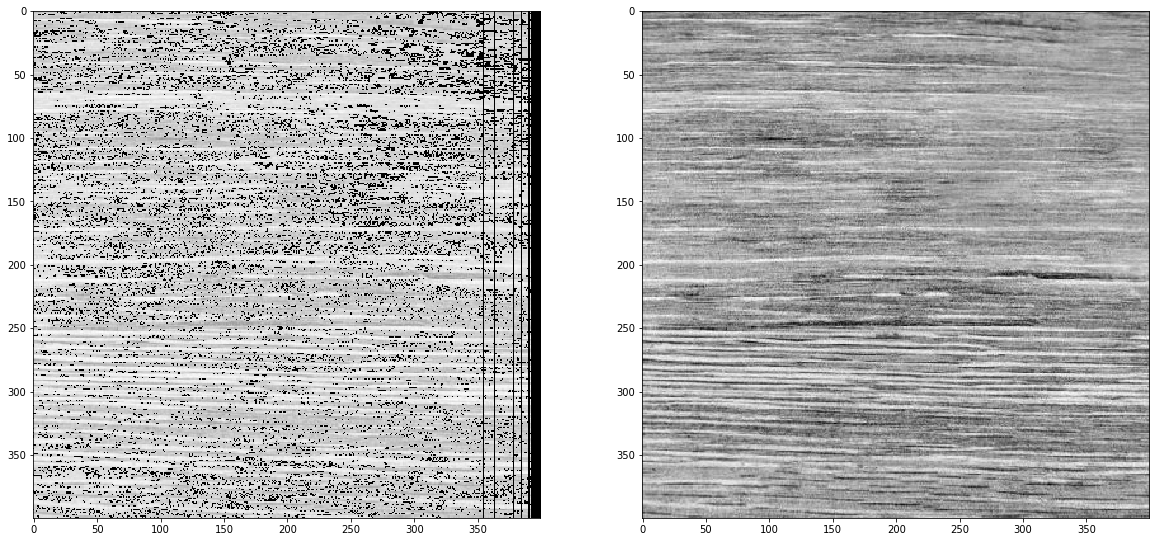

In [106]:
#applying control
img_controlled_x=np.where((img<x_lcl)|(img>x_ucl),img,0)
fig,ax=plt.subplots(ncols=2,figsize=(20,15))
ax[0].imshow(img_controlled,cmap="gray")
ax[1].imshow(img,cmap="gray")

# task 2

Image shape: (400, 400)
Patches shape: (122500, 51, 51)


c:\python\python36\lib\site-packages\sklearn\feature_extraction\image.py:287: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  indexing_strides = arr[slices].strides


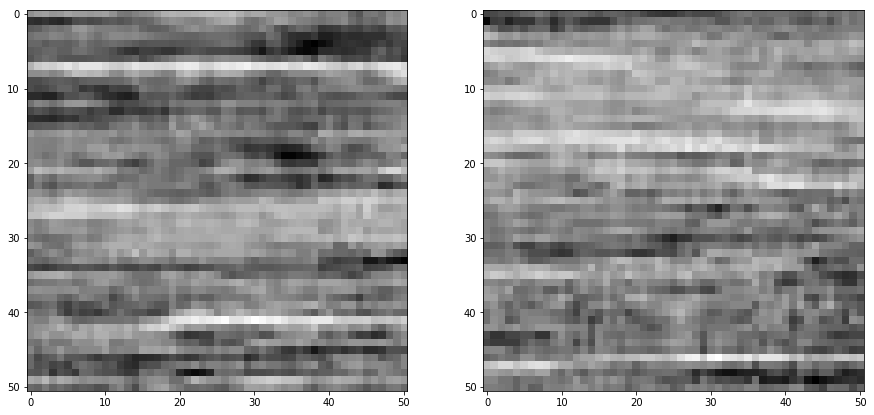

In [107]:
from sklearn.feature_extraction import image
print('Image shape: {}'.format(img.shape))
patches = image.extract_patches_2d(img, (51, 51))
print('Patches shape: {}'.format(patches.shape))
fig,ax=plt.subplots(1,2,figsize=(15,10))
ax[0].imshow(patches[1],cmap="gray")
ax[1].imshow(patches[22000],cmap="gray");

In [127]:
import pandas as pd
patches=patches.reshape((122500,2601))
patches=pd.DataFrame(patches)
patches.head()

,0,1,2,3,4,5,6,7,8,9,...,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600
0,210,210,213,214,211,212,215,213,213,212,...,206,208,205,202,199,195,199,198,203,204
1,210,213,214,211,212,215,213,213,212,213,...,208,205,202,199,195,199,198,203,204,199
2,213,214,211,212,215,213,213,212,213,214,...,205,202,199,195,199,198,203,204,199,195
3,214,211,212,215,213,213,212,213,214,210,...,202,199,195,199,198,203,204,199,195,196
4,211,212,215,213,213,212,213,214,210,204,...,199,195,199,198,203,204,199,195,196,197


In [128]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(patches.drop(columns=[1300]),patches[1300])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [141]:
preds=model.predict(patches.drop(columns=[1300]))

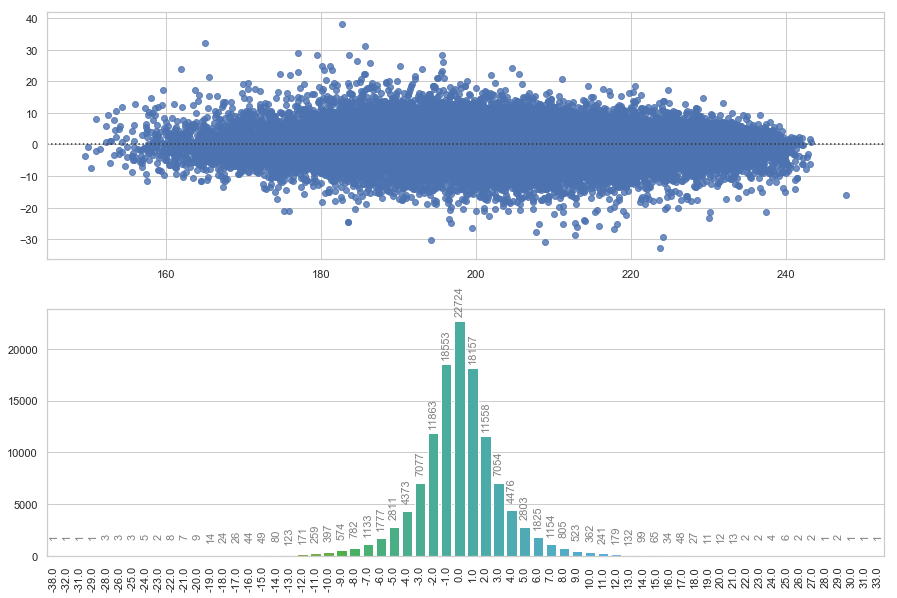

In [165]:
fig,ax=plt.subplots(nrows=2,figsize=(15,10))
sns.residplot(preds, patches[1300].values,ax=ax[0])
residuals=preds-patches[1300].values
vals,counts=np.unique(np.round(residuals),return_counts=True)
g=sns.barplot(vals,counts,ax=ax[1])
g.set_xticklabels(labels=vals,rotation=90)
for p in ax[1].patches:
             ax[1].annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', rotation=90, xytext=(0, 20),
                 textcoords='offset points')

In [174]:
from scipy.stats import norm
x_bar=residuals.mean()
s_=np.std(residuals,ddof=1)
ucl=x_bar+3*s_
lcl=x_bar-3*s_

In [190]:
ooc_pixels=np.where((residuals<lcl)|(residuals>ucl))[0]

In [207]:
patches_cnt=patches.copy()
patches_cnt.head()

,0,1,2,3,4,5,6,7,8,9,...,2591,2592,2593,2594,2595,2596,2597,2598,2599,2600
0,210,210,213,214,211,212,215,213,213,212,...,206,208,205,202,199,195,199,198,203,204
1,210,213,214,211,212,215,213,213,212,213,...,208,205,202,199,195,199,198,203,204,199
2,213,214,211,212,215,213,213,212,213,214,...,205,202,199,195,199,198,203,204,199,195
3,214,211,212,215,213,213,212,213,214,210,...,202,199,195,199,198,203,204,199,195,196
4,211,212,215,213,213,212,213,214,210,204,...,199,195,199,198,203,204,199,195,196,197


In [208]:
patches_cnt=patches_cnt.values
for ooc in tqdm(ooc_pixels):
    patches_cnt[ooc]=np.full(2601,0)

100%|██████████| 2046/2046 [00:00<00:00, 17203.18it/s]


In [212]:
patches_cnt=patches_cnt.reshape((122500, 51, 51))
patches_cnt[2142]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

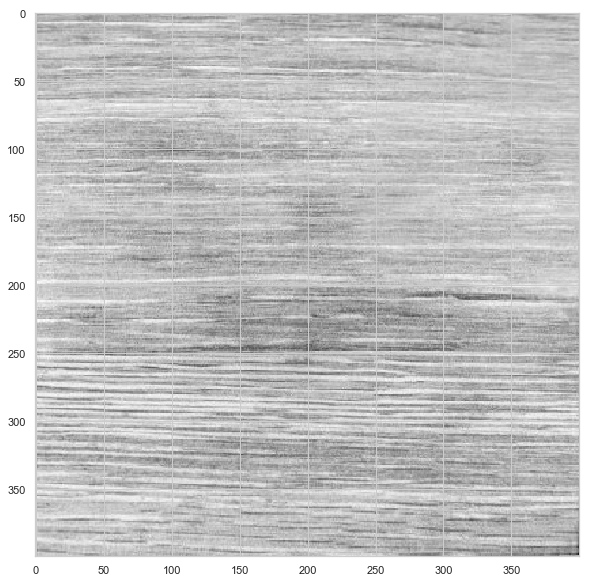

In [213]:
img_cnt=image.reconstruct_from_patches_2d(patches_cnt, (400, 400))
plt.figure(figsize=(15,10))
plt.imshow(img_cnt,cmap="gray")